In [352]:
import numpy as np
from matplotlib import pyplot as plt
import random
import scipy.stats as sps
import seaborn as sns

from scipy.stats import skew 

In [353]:
N     = 25  # Объём выборки 
max_x = 1  # Максимальное значение в выборке
sampling_mode = np.array([-np.log(random.random()) for _ in range(N)])
# sampling_mode = np.array([random.random() for _ in range(N)])
# sampling_mode = sps.norm.rvs(size=N)
sampling_l = np.max(sampling_mode) - np.min(sampling_mode)

## Пункт "a"

In [354]:
print(f"Мода выборки: {list(sampling_mode)}") 
print(f"Медиана выборки: {np.median(sampling_mode)}")
print(f"Размах выборки: {sampling_l}")
print(f"Коэффициент ассиметрии выборки: {sps.moment(sampling_mode, 3)/sps.moment(sampling_mode, 2)**(3/2)}")

Мода выборки: [1.695315540619489, 0.11669460751393247, 0.192302280530464, 1.9279429827223087, 1.5251237674099312, 0.31401521240506364, 4.024113332620908, 0.002491197249616507, 0.8092139359602573, 0.35222136115408736, 0.30781762110515526, 0.7548276332199837, 0.9383445332544041, 0.9973756837930567, 1.7945194207150466, 1.1482678767798393, 1.1037927287518325, 0.2785591668788081, 1.8413756728382873, 1.3119214377617152, 0.7412301510274608, 0.0035309307681125027, 0.5132427555730356, 0.5590893904307801, 1.8399292510921006]
Медиана выборки: 0.8092139359602573
Размах выборки: 4.021622135371292
Коэффициент ассиметрии выборки: 1.5708613408372025


## Пункт "b"

### Эмпирическая функция распределения

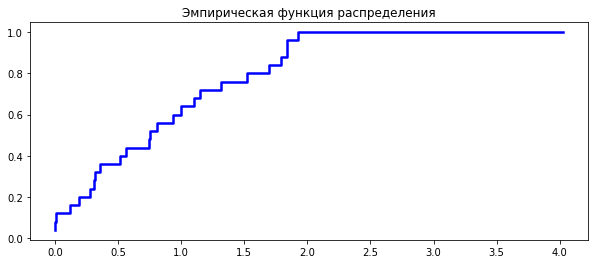

In [355]:
plt.figure(figsize=(10, 4))
plt.title("Эмпирическая функция распределения")
plt.step(np.sort(sampling_mode), [i/N for i in range(1,N+1)], linewidth = 2.5, c= 'b');
plt.show()

### Boxplot

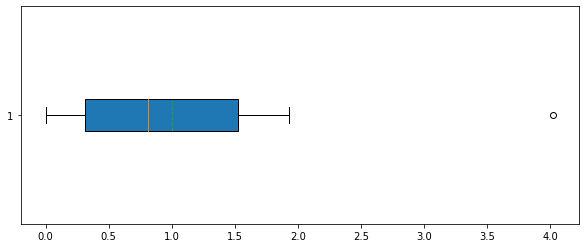

In [356]:
fig = plt.figure(figsize =(10, 4))
ax = fig.add_subplot()
bp = ax.boxplot(np.sort(sampling_mode), patch_artist=True, meanline=True, showmeans=True, vert=0)
plt.show() 

## Пункт "c"

### Ядерная оценка плотности

In [357]:
k = 1 + np.log2(N)
delta = sampling_l/k

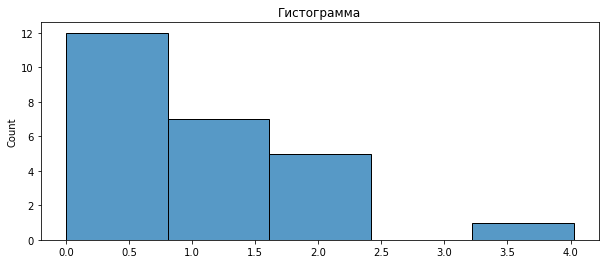

In [358]:
plt.figure(figsize=(10, 4))
plt.title("Гистограмма")
sns.histplot(data=sampling_mode, bins=int(k))
plt.show()

In [359]:
# import numpy as np
# import pandas as pd
# from scipy import stats
# import matplotlib.pyplot as plt
# import seaborn as sns
# from pylab import rcParams
# sns.set()
# rcParams['figure.figsize'] = 10, 6
# %config InlineBackend.figure_format = 'svg'
# np.random.seed(42)

## Пункт "d"

### Бутстреповская оценка плотности

In [360]:
butstrap_arr = np.zeros((1000))
for i in range(1000):
    tmp = np.array([sampling_mode[random.randint(0,N-1)] for _ in range(N)])
    butstrap_arr[i] = np.average(tmp)

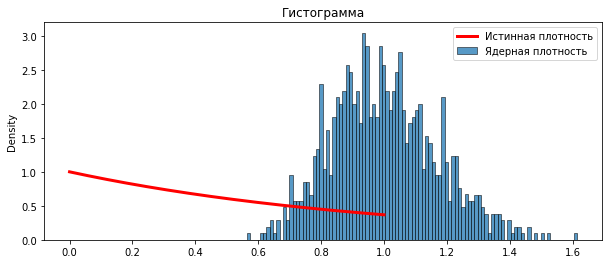

In [361]:
plt.figure(figsize=(10, 4))
plt.title("Гистограмма")
sns.histplot(data=butstrap_arr, bins=100, label='Ядерная плотность', stat='density')
grid = np.linspace(0, max_x, 500)
plt.plot(grid, np.exp(-grid), lw=3, color='red', label='Истинная плотность')
plt.legend()
plt.show()


## Пункт "e"

## Пункт "f"

## Тест


In [362]:
N = 1000000
sampling_mode = np.array([-np.log(random.random()) for _ in range(N)])
# sampling_mode = np.array([random.random() for _ in range(N)])
# sampling_mode = sps.norm.rvs(size=N)

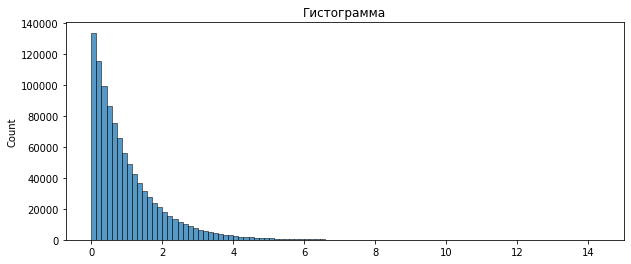

In [363]:
plt.figure(figsize=(10, 4))
plt.title("Гистограмма")
sns.histplot(data=sampling_mode, bins=100)
plt.show()